## Project 1 Residency 2 - Supervised Learning - Raja Kumar Gedela

### 1. Import and store the data in a data frame. (2.5 points)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
col_names_list = ['City1', 'City2', 'Average Fare', 'Distance', 'Average weekly passengers', 'market leading airline', 'market share', 'Average fare', 'Low price airline', 'market share', 'price']
col_names_list

['City1',
 'City2',
 'Average Fare',
 'Distance',
 'Average weekly passengers',
 'market leading airline',
 'market share',
 'Average fare',
 'Low price airline',
 'market share',
 'price']

In [3]:
airq402_df = pd.read_fwf('airq402.dat', names=col_names_list, header=None )

C:\Users\rwuser2\Anaconda3\lib\site-packages\pandas\io\parsers.py:710: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [4]:
airq402_df.head(10)

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [5]:
airq402_df.describe()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [6]:
airq402_df.count()

City1                        1000
City2                        1000
Average Fare                 1000
Distance                     1000
Average weekly passengers    1000
market leading airline       1000
market share                 1000
Average fare                 1000
Low price airline            1000
market share.1               1000
price                        1000
dtype: int64

In [7]:
#splt = pd.scatter_matrix(airq402_df, figsize=(20, 20), marker='o')

In [8]:
airq402_df.columns

Index(['City1', 'City2', 'Average Fare', 'Distance',
       'Average weekly passengers', 'market leading airline', 'market share',
       'Average fare', 'Low price airline', 'market share.1', 'price'],
      dtype='object')

### 2. Remove the outliers from the data (5 points)

In [9]:
 airq402_df['Average Fare'].dtypes

dtype('float64')

In [10]:
 airq402_df.dtypes

City1                         object
City2                         object
Average Fare                 float64
Distance                       int64
Average weekly passengers    float64
market leading airline        object
market share                 float64
Average fare                 float64
Low price airline             object
market share.1               float64
price                        float64
dtype: object

In [11]:
# Do this only for Numeric Columns
# airq402_df = remove_outlier(airq402_df, list of numeric columns)
num_column_list = ['Average Fare', 'Distance', 'Average weekly passengers', 'market share', 'Average fare', 'market share', 'price']
num_column_list

['Average Fare',
 'Distance',
 'Average weekly passengers',
 'market share',
 'Average fare',
 'market share',
 'price']

In [12]:
def remove_outlier(df, col_name):
    #if ((df[col_name].dtypes == 'float64') | (df[col_name].dtypes == 'int64')):
    #if (df[col_name].dtypes != 'O')
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        IQR = q3-q1 #Interquartile range
        lowVal  = q1-1.5*IQR
        highVal = q3+1.5*IQR
        retain = df.loc[(df[col_name] > lowVal) & (df[col_name] < highVal)]
        return retain

for col in num_column_list: #airq402_df.columns:
    airq402_df = remove_outlier(airq402_df, col)
print (len(airq402_df))

877


### 4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [13]:
airq402_df.corr()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
Average Fare,1.000000,0.512280,-0.194769,-0.202205,0.979853,-0.498025,0.837329
Distance,0.512280,1.000000,-0.123024,-0.546091,0.480295,-0.361306,0.531995
Average weekly passengers,-0.194769,-0.123024,1.000000,0.018146,-0.160751,0.074210,-0.206307
market share,-0.202205,-0.546091,0.018146,1.000000,-0.188915,0.280194,-0.309026
Average fare,0.979853,0.480295,-0.160751,-0.188915,1.000000,-0.522616,0.790611
market share.1,-0.498025,-0.361306,0.074210,0.280194,-0.522616,1.000000,-0.261714
price,0.837329,0.531995,-0.206307,-0.309026,0.790611,-0.261714,1.000000


In [14]:
airq402_df.columns

Index(['City1', 'City2', 'Average Fare', 'Distance',
       'Average weekly passengers', 'market leading airline', 'market share',
       'Average fare', 'Low price airline', 'market share.1', 'price'],
      dtype='object')

In [15]:
# drop Average weekly passengers, market share, market share.1 
airq402_df2 = airq402_df.drop(['Average weekly passengers', 'market share', 'market share.1'], axis=1)

In [16]:
airq402_df2.corr()

,Average Fare,Distance,Average fare,price
Average Fare,1.000000,0.512280,0.979853,0.837329
Distance,0.512280,1.000000,0.480295,0.531995
Average fare,0.979853,0.480295,1.000000,0.790611
price,0.837329,0.531995,0.790611,1.000000


### 3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [17]:
airq402_df2.head()

,City1,City2,Average Fare,Distance,market leading airline,Average fare,Low price airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42


In [18]:
X = airq402_df2.loc[:,["Distance", "Average fare", "price"]]
X.head()

,Distance,Average fare,price
0,528,111.03,111.03
1,860,123.09,118.94
2,852,223.98,167.12
3,288,68.86,68.86
4,723,161.36,145.42


In [19]:
y = airq402_df.loc[:,["Average Fare"]]
y.head()

,Average Fare
0,114.47
1,122.47
2,214.42
3,69.40
4,158.13


In [20]:
type(X)

pandas.core.frame.DataFrame

In [21]:
type(y)

pandas.core.frame.DataFrame

### 5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

C:\Users\rwuser2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


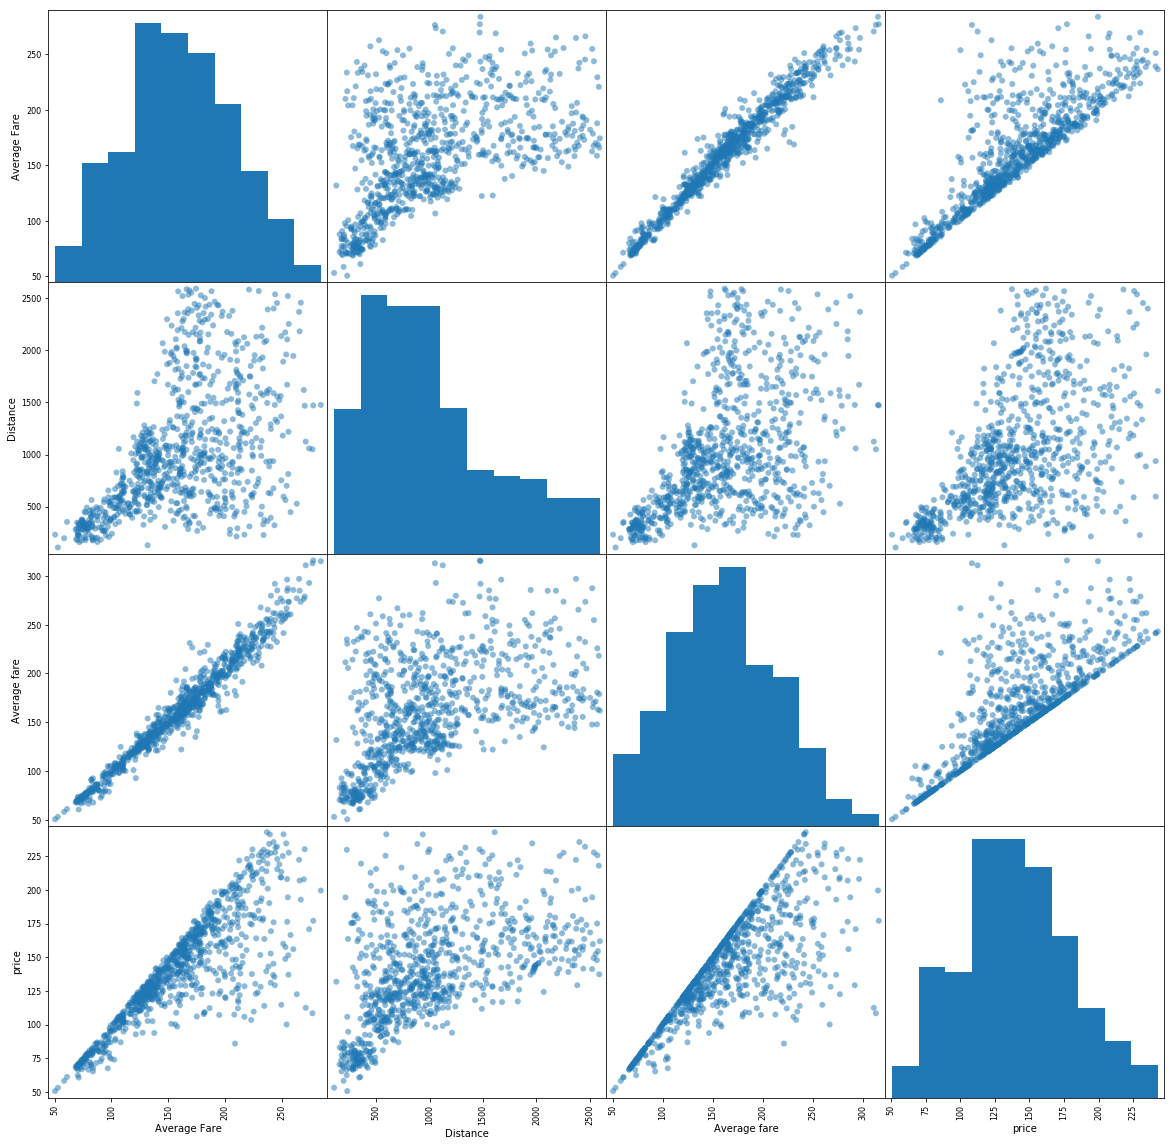

In [22]:
splt = pd.scatter_matrix(airq402_df2, figsize=(20, 20), marker='o')

### 6.Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [23]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  

print(X_train)

     Distance  Average fare   price
30        812        212.59  193.01
370       802        107.19  103.45
282       286         66.40   66.40
868      1012        184.74  184.74
526       673        138.30  122.91
966       626        119.81  119.81
886      1929        216.10  159.55
984      2392        265.35  200.96
841       722        145.82  127.08
688       414         80.29   80.29
801      1751        158.65  151.64
192      1249        148.87  135.26
963       869        154.49  154.49
502      1932        248.71  177.49
393       304         80.58   80.58
140       377         73.76   73.76
80        483        195.33  192.04
626       873        138.93  122.44
124       314         78.32   78.32
865      1210        125.59   93.88
610      1900        227.68  181.09
267      1237        192.58  171.00
993      1216        126.38  126.38
330       589        225.45  225.45
633       543         91.02   91.02
593       423        114.41  114.41
168       570        131.94 

In [24]:
print(X_train.shape)
print(X_test.shape)

(701, 3)
(176, 3)


In [25]:
from sklearn.linear_model import LinearRegression  
reg1 = LinearRegression()  
lm = reg1.fit(X_train, y_train) 

### 7.Print the coefficients & intercepts of the linear regression model (5 points)

In [26]:
X.columns

Index(['Distance', 'Average fare', 'price'], dtype='object')

In [34]:
reg1.coef_

array([[0.00232426, 0.76327731, 0.19001862]])

In [35]:
reg1.intercept_

array([7.09101557])

In [29]:
#coeff_df = pd.DataFrame(data=reg1.coef_, index=X.columns, columns=['Coefficient'])  
#coeff_df

### 8.Print the accuracy of the overall model (2.5 points)

In [30]:
r2 = reg1.score(X_train,y_train)
print(r2)

0.9688159870008729


In [31]:
reg1.score(X_train, y_train)

0.9688159870008729

In [32]:
reg1.score(X_test, y_test)

0.9782401445211394